In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
x = pd.DataFrame(data, columns=feature_names)

target = boston["target"]
y = pd.DataFrame(target, columns=["price"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42 )

scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

x_train_tsne = tsne.fit_transform(x_train_scaled)

In [6]:
model_km = KMeans(n_clusters=3, random_state=100)
train_labels = model_km.fit_predict(x_train_scaled)
centers = scaler.inverse_transform(model_km.cluster_centers_)

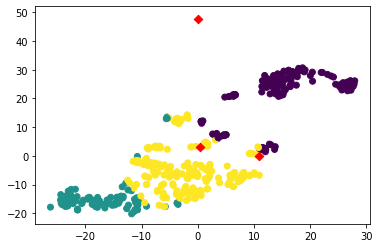

In [7]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1],c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')
plt.show()